![Image](./picture.jpg)

In [51]:
import imutils
import cv2
import webcolors
from matplotlib import pyplot as plt


In [60]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

# READ, SHOW, TAKE SHAPE OF IMAGE

In [4]:
image = cv2.imread("./picture.jpg") #Read the image

print(len(image)) #It is a array of length 2048 as for the height
(h, w, d) = image.shape # Get the image shape
print(f'{w}:{h}:{d}') #Display it

#Height is the number of rows while width represent the number of columns
#Depth denote the color size

cv2.imshow("Image", image)
cv2.waitKey(0) #Necessary for loading the picture

2048
1365:2048:3


-1

In [18]:
(B, G, R) = image[100, 50]
print(f'{R}, {G}, {B}')
#Print the rgb code of the pixel at the position y = 100, x= 50
cv2.imshow('pixel 100:50', image[100,50])
cv2.waitKey(0)


152, 155, 128


-1

# TAKE A PORTION OF IMAGE

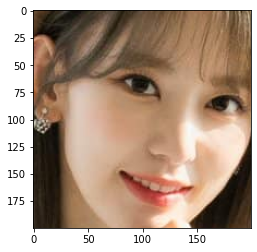

In [69]:
roi = image[700:900, 700:900]
#Pick the pixel from height, width
cv2.imshow("ROI", roi)
cv2.waitKey(0)
showImage(roi)

# RESIZE IMAGE
## Fixed resizing

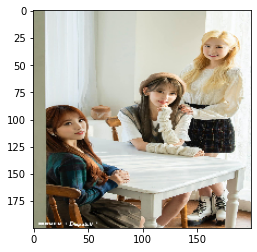

In [68]:
resized = cv2.resize(image, (200,200))
# Fixedly resizing the image and change it into w= 200, h= 200
cv2.imshow('Fixed Resizing', resized)
cv2.waitKey(0)
 
showImage(resized)

## Ratio resizing

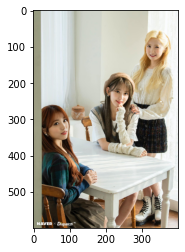

In [67]:
r = 400.0 / w #Take the ratio
dim = (400, int(h * r)) #Then calculate new height according to the ratio
resized2 = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized2)
cv2.waitKey(0)

showImage(resized2)

## Easier ratio resizing

199 300 3


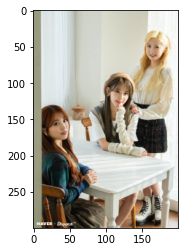

In [66]:
resized = imutils.resize(image, height=300) 
#Call the imutils library with the new width or height you want
cv2.imshow("Imutils Resize", resized)
nH, nW, nS = resized.shape
print(nW, nH, nS)
cv2.waitKey(0)

showImage(resized)

# Rotating image

## Clockwise

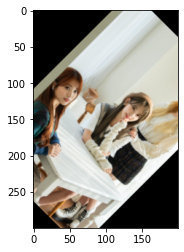

In [65]:
# Take the center position
center = (nW // 2, nH // 2)
# Constructing the rotation matrix
M = cv2.getRotationMatrix2D(center, -45, 1.0)
# Applying the affline warp
rotated = cv2.warpAffine(resized, M, (nW,nH))

cv2.imshow("OpenCv Rotation 45 degrees clockwise", rotated)
cv2.waitKey(0)

showImage(rotated)

## Easier version using imutils

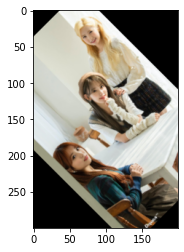

In [64]:
#Reverse image in a counter-clockwise way
rotated = imutils.rotate(resized, 45)
cv2.imshow("Imutils Rotation", rotated)
cv2.waitKey(0)
showImage(rotated)

### Make it better with clipping

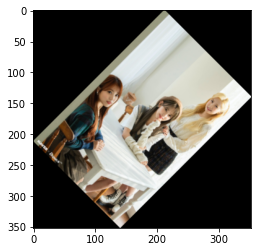

In [63]:
#Make it not getting clipped after rotation
rotated = imutils.rotate_bound(resized, 45)
cv2.imshow("Imutils Bound Rotation", rotated)
cv2.waitKey(0)
showImage(rotated)

# Smoothing an image

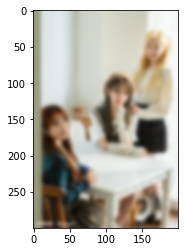

In [62]:
blurred = cv2.GaussianBlur(resized, (15, 15), 0)
#Can only be range from around 11 - 15
showImage(blurred)

# Face detection by adarsh

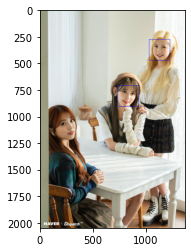

In [71]:
face_cascade = cv2.CascadeClassifier('./easyFD/facedetection/haarcascade_frontalface_default.xml')
img = cv2.imread('./picture.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

showImage(img)